## Test des paramètres à 10_000 items

In [7]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou2_solver as tbs
from tools.tabou2_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *

# Chargement des fichiers

sad1 = parser.loadFromFile("Data/pi-12-10000-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-10000-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-10000-1000-001.kna")

# Récupérations des résultats optimaux

solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("\nles solutions optimales sont")
print("\tsad 1 :",sol_opti1,"pour",sad1.name)
print("\tsad 2 :",sol_opti2,"pour",sad2.name)
print("\tsad 3 :",sol_opti3,"pour",sad3.name)

loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 610klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 515klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 465klines/s]



les solutions optimales sont
	sad 1 : 45105 pour pi-12-10000-1000-001.kna
	sad 2 : 64077 pour pi-13-10000-1000-001.kna
	sad 3 : 50622 pour pi-15-10000-1000-001.kna


### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   overflow_cost : si =1, 1kg en trop == 1 point de fitness en moins, 2 pour 2 etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [2]:
iter_max = 3500
tabu_size = 500
overflow_cost = 3.0#on est sur d'être au delà du ratio max
init_size = 0.01#les capa sont entre 35k et 49k, donc on peut mettre entre 350 et 490 kg au départ, plusieurs items 

group_size = 3 #nombre de tests de chaque paramètres dans une éxecutions.
#sur les graphiques seront affichés le max, le min et l'élément central

#### Test taille TABU

calcul: 100%|██████████| 11/11 [09:48<00:00, 53.47s/batch]


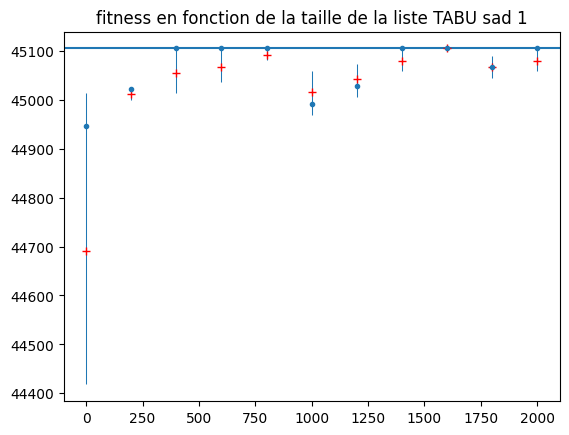

calcul: 100%|██████████| 11/11 [06:42<00:00, 36.60s/batch]


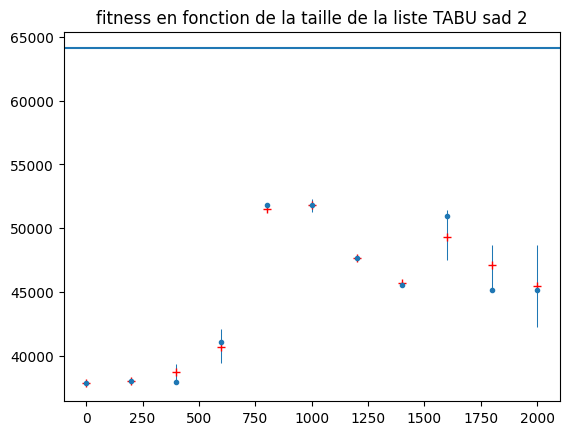

calcul:  18%|█▊        | 2/11 [01:17<04:48, 32.08s/batch]

In [ ]:
(variateur,title) = variateur_tabou2.liste_tabou2()

iterateur = range(2000,-1,-200)#on commence par les calculs les plus lourds (même si ça change pas grand chose)

test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

calcul: 100%|██████████| 11/11 [04:28<00:00, 24.37s/batch]


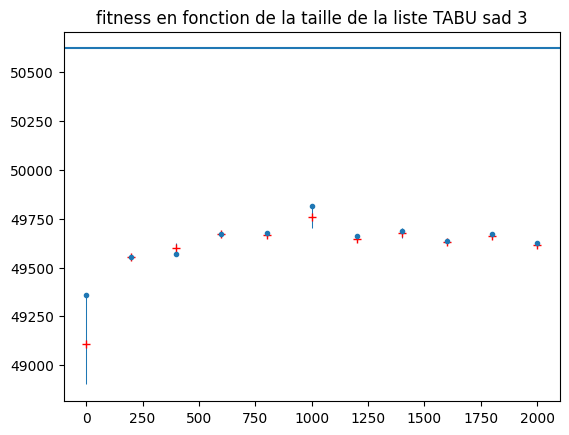

In [6]:
(variateur,title) = variateur_tabou2.liste_tabou2()

iterateur = range(2000,-1,-200)

myrange = range(1250,6500,500)
test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

Pour le premier sac à dos : croissance jusqu'à 800 (où on trouve 2 résultats optimaux), puis au delà de 1000 c'est plus complexe.

Pour le second : entre 800 et 1000 c'est le mieux.

Pour le troisième : 

In [ ]:
tabu_size_1 = 800
tabu_size_2 = 900
tabu_size_3 = 1000

calcul: 100%|██████████| 18/18 [06:48<00:00, 22.68s/batch]  


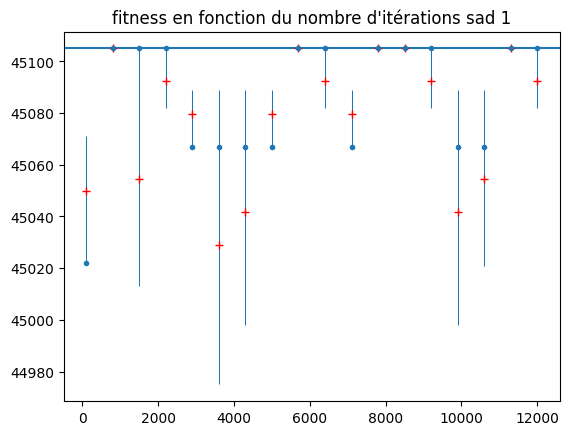

calcul: 100%|██████████| 18/18 [06:55<00:00, 23.07s/batch]


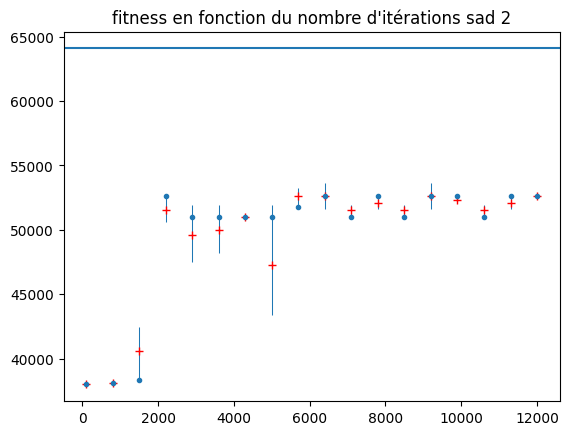

calcul: 100%|██████████| 18/18 [07:51<00:00, 26.17s/batch]  


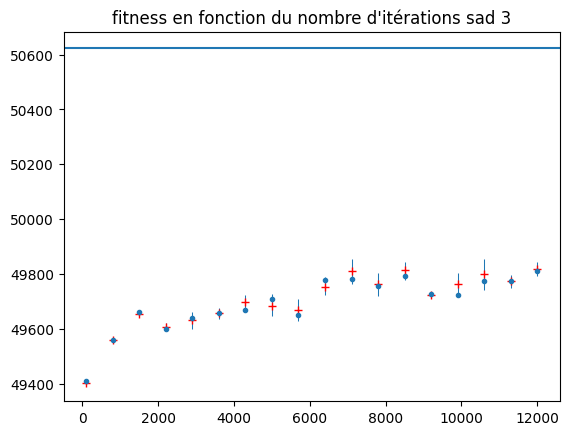

In [8]:
(variateur,title) = variateur_tabou2.nombre_iterations()
it = range(6000,0,-700)
solver = tbs.tabou2_solver(sad1,iter_max,tabu_size_1,overflow_cost,init_size)
testResult = Testor(solver).test(it,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size_2,overflow_cost,init_size))
testResult = test.test(it,variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size_3,overflow_cost,init_size))
testResult = test.test(it,variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


sad1 : au delà de 700, ça n'a pas l'air de changer grand chose ( un pic à 2000 qui semble fortuit)

sad2 : à partir de 700, c'est litéralement parfait.

sad3 : au delà de 700, le résultat est meilleurs, mais cesse d'évoluer.


## Le comptage négatif du poids supplémentaire

In [4]:
iter_max1 = 2500
iter_max2 = 2500
iter_max3 = 5000#plus c'est trop long

calcul: 100%|██████████| 7/7 [01:05<00:00,  9.31s/batch]


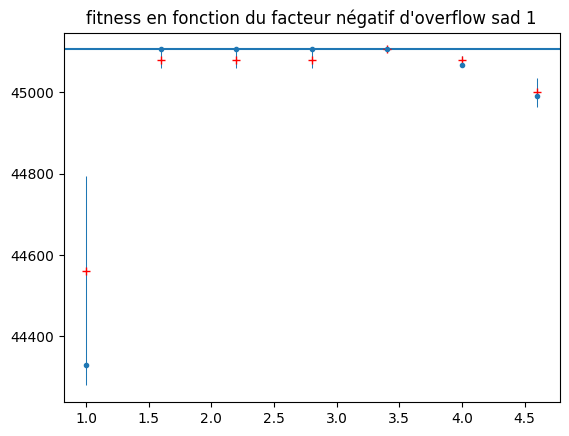

calcul: 100%|██████████| 7/7 [01:12<00:00, 10.35s/batch]


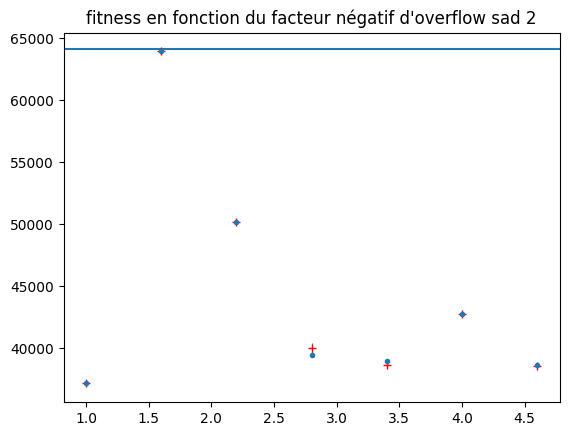

calcul: 100%|██████████| 7/7 [02:23<00:00, 20.45s/batch] 


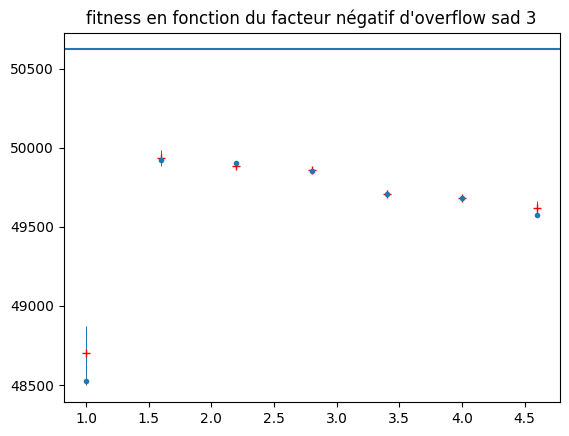

In [14]:
iter = floatRange(1,5,0.6)

(var,titre) = variateur_tabou2.compte_negatif_des_points()

solver = tbs.tabou2_solver(sad1,iter_max1,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou2_solver(sad2,iter_max2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou2_solver(sad3,iter_max3,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



calcul: 100%|██████████| 8/8 [01:17<00:00,  9.72s/batch]


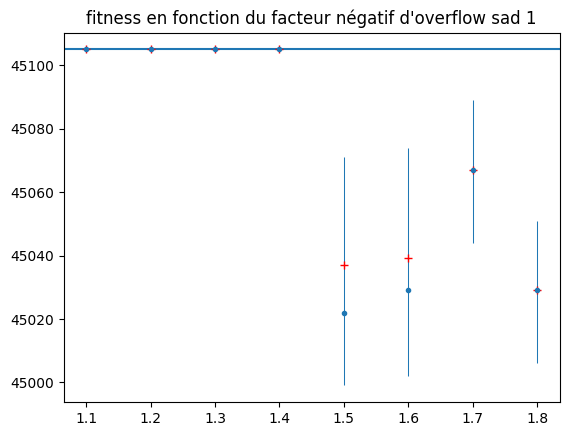

calcul: 100%|██████████| 8/8 [01:28<00:00, 11.00s/batch]


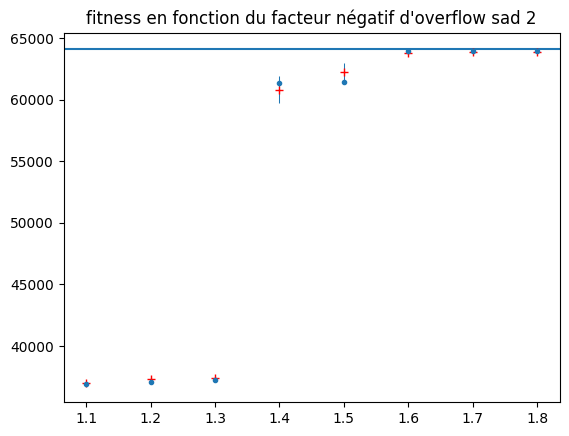

calcul: 100%|██████████| 8/8 [02:46<00:00, 20.85s/batch] 


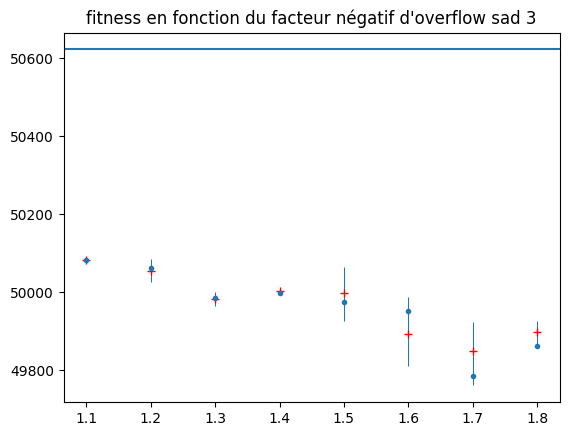

In [15]:
# zoom 
iter = floatRange(1.1,1.9,0.1)

(var,titre) = variateur_tabou2.compte_negatif_des_points()

solver = tbs.tabou2_solver(sad1,iter_max1,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou2_solver(sad2,iter_max2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou2_solver(sad3,iter_max3,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")

sad1 : entre 1.1 et 1.4 c'est plutôt bon.

sad2 : Entre 1.6 et 1.8 c'est parfait (ou presque). Sinon, c'est mauvais.

sad3 : Mauvais si moins de 1, puis décroissance continue au delà de 1.1

## variation de la taille de la solution initiale

In [5]:
overflow_cost1 = 1.1
overflow_cost2 = 1.8
overflow_cost3 = 1.1

calcul: 100%|██████████| 15/15 [02:46<00:00, 11.07s/batch]


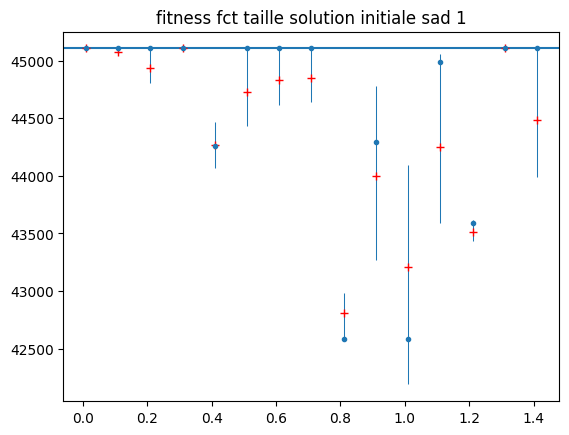

calcul: 100%|██████████| 15/15 [02:51<00:00, 11.43s/batch]


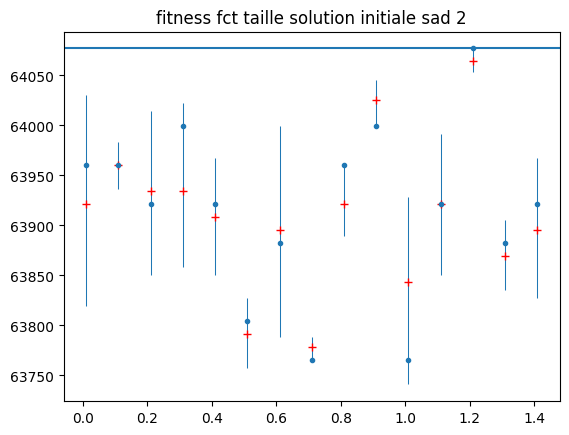

calcul: 100%|██████████| 15/15 [05:20<00:00, 21.35s/batch]


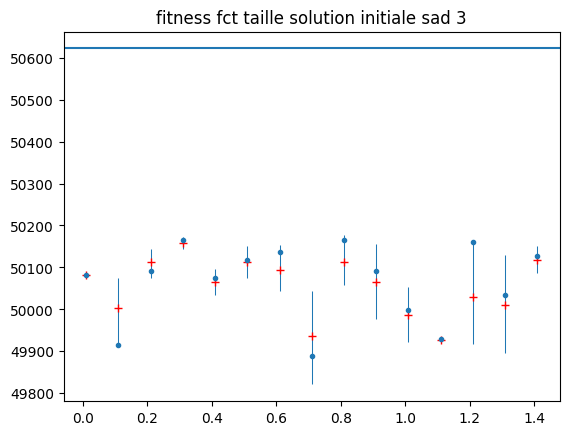

In [6]:
(variateur,title) = variateur_tabou2.poids_inital()
closeIter = floatRange(0.01,1.5,0.1)
test = Testor(tbs.tabou2_solver(sad1,iter_max1,tabu_size_1,overflow_cost1,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max2,tabu_size_2,overflow_cost2,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max3,tabu_size_3,overflow_cost3,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


pour le premier sac à dos, tant que le sac à dos est remplis à moins de 30% au départ, on a de bons résultats.

Pour le second, les valeurs semblent meilleures entre 0 et 0.35 (mais c'est mitigé)

Pour le troisème, le remplissage initial ne semble pas avoir d'influence.

### Résultats "optimaux"

In [ ]:
overflow_cost1 = 1.1
overflow_cost2 = 1.8
overflow_cost3 = 1.1

iter_max1 = 2500
iter_max2 = 2500
iter_max3 = 5000

taille_init1 = 0.3
taille_init2 = 0.3
taille_init3 = 0.3

tabu_size_1 = 800
tabu_size_2 = 900
tabu_size_3 = 1000

In [ ]:
solver1 = tbs.tabou2_solver(sad1,tabu_size_1,tabu_size_1,overflow_cost1,taille_init1)
solver2 = tbs.tabou2_solver(sad2,tabu_size_2,tabu_size_2,overflow_cost2,taille_init1)
solver3 = tbs.tabou2_solver(sad3,tabu_size_3,tabu_size_3,overflow_cost3,taille_init3)

#TODO : tester le temps que ça prend ?

### Pour le génitif